# [WUM] PD2
## Kacper Kurowski

# 1. Kodowanie danych
Zacznijmy od załączenia paczek, wczytania danych i 

In [ ]:
import pandas as pd

In [2]:
data = pd.read_csv("https://www.dropbox.com/s/360xhh2d9lnaek3/allegro-api-transactions.csv?dl=1")

In [3]:
data.head()

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,Warszawa,Komputery
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,Warszawa,"Odzież, Obuwie, Dodatki"
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,0,7389,Leszno,Dom i Ogród
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,0,15006,Wola Krzysztoporska,Książki i Komiksy
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,0,32975,BIAŁYSTOK,"Odzież, Obuwie, Dodatki"


In [7]:
means = data.groupby('it_location')['price'].mean()
data['it_location_encoded'] = data['it_location'].map(means)


In [8]:
print(data)

            lp                 date     item_id  \
0            0  2016-04-03 21:21:08  4753602474   
1            1  2016-04-03 15:35:26  4773181874   
2            2  2016-04-03 14:14:31  4781627074   
3            3  2016-04-03 19:55:44  4783971474   
4            4  2016-04-03 18:05:54  4787908274   
...        ...                  ...         ...   
420015  420015  2016-04-03 20:27:13  6099625607   
420016  420016  2016-04-03 22:35:02  6099634607   
420017  420017  2016-04-03 22:38:57  6099780407   
420018  420018  2016-04-03 22:44:17  6099801007   
420019  420019  2016-04-03 23:08:23  6099873207   

                                               categories  \
0       ['Komputery', 'Dyski i napędy', 'Nośniki', 'No...   
1       ['Odzież, Obuwie, Dodatki', 'Bielizna damska',...   
2       ['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...   
3       ['Książki i Komiksy', 'Poradniki i albumy', 'Z...   
4       ['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...   
...                  

## Przewagi target nad one_hot

Prawdopodobnie największą przewagą target encoding nad one hot jest to, że target encoding znacząco zmniejsza pamięć potrzebną do zapisania (w szczególności sporej liczby) kategorii. Zasadniczo nie jet istotna liczba kategorii, gdyż i tak wynikiem będzie float. 

Kolejną przewagą jest to, że przy dostatecznie dużej liczby danych możemy uchwycić nietrywialne zależności między niezbyt dokładnie spreparowanymi danymi, tzn. zauważmy, że zmienna it_location nie ma ustalonej konwencji zapisowej - Mamy "Warszawa", "Leszno", ale także "BIAŁYSTOK" - tylko capsem. Gdyby zatem funkcjonowała także nazwa "Białystok", to one hot uznałby te nazwy jako inne, choć reprezentują ten sam obiekt. Target encoding z kolei, pod warunkiem dostatecznie wielu danych (dla obydwu nazw) ma szansę ujednolicić je.  

Powyżej wymieniona cecha jest jednak też czymś, co może zostać potratowane jako wadę - one hot wszystkie różniące się zmienne traktuje inaczej, podczas gdy target zlewa je do porównywalnych ze sobą liczb typu float - pozwalając na porównywanie nie do końca porównywalnych ze sobą nazw. 

Jeszcze jedną zaletą target jest to, że wykorzystuje ona dane z dwóch kolummn - jednej, do zakodowania, drugiej do zagregowania informacji względem zmiennej, którą kodujemy - tym samym uzyskujemy częściową informację z jednej z kolumn

## Porównanie 3 metod

In [16]:
from numpy import array
import category_encoders as ce


In [17]:
values = array( data.main_category)

# onehot encode
onehot_encoded = ce.OneHotEncoder().fit_transform(data.main_category)
print( "OneHot Encoder:", onehot_encoded)
# binary encode
binary_encoded = ce.BinaryEncoder().fit_transform(data.main_category)
print( "Binary Encoder:", binary_encoded)
# count encode
count_encoded = ce.count.CountEncoder().fit_transform(data.main_category)
print( "Count Encoder:", count_encoded)

OneHot Encoder:         main_category_1  main_category_2  main_category_3  main_category_4  \
0                     1                0                0                0   
1                     0                1                0                0   
2                     0                0                1                0   
3                     0                0                0                1   
4                     0                1                0                0   
...                 ...              ...              ...              ...   
420015                0                0                0                0   
420016                0                0                0                0   
420017                0                1                0                0   
420018                0                0                0                0   
420019                0                0                0                0   

        main_category_5  main_category_6  main_

### Wyjaśnienie działania:

Niech $n$ będzie liczbą nazw w danej kolumnie
* One-hot encoder zapisuje każdą nazwę jako wektor n-wymiarowy
* Binary encoder zapisuje każdą nazwę jako ciąg (krotkę) binarny długości $ \approx \lceil log_2(n )\rceil$
* Count encoder zapisuje każdą nazwę jako liczbę powtórzeń tej nazwy w danej kolumnie

Należy zaznaczyć, że o ile dwa pierwsze sposoby encodowania są różnowartościowe, o tyle trzeci już niekoniecznie - co może ograniczyć jego uzyteczność. Trzeci sposób moze być zarazem najefektywniejszy, jak i najmniej efektywny pamięciowo - dla małej liczby bardzo często powtarzającyh się kategorii niepotrzebnie będzie kodował kategorie poprzez duże liczby.
Drugi sposób kodowania jest efektywniejszy pamięciowo (gdyby krokta binarna była krotką binarną w pamięci) niż pierwszy. 

Zależnie od sytuacji pierwszy jak i trzeci sposób kodowania może dawać problematyczne rezultaty - pierwszy nie dba o liczbę powtórzeń, zaś drugi o liczbę kategorii. Gdyby zatem mieć 1000 kategorii, każda występująca 1 raz, to pierwszy sposób by zapisywał dane jako ciag długości 1000, z kolei trzeci wszystkie by zrzutował na 1.

Powyższe uwagi mogłyby sugerować, że binary encode jest lepszy od pozostałych. Jednakże, ten sposób zakodowywania prowadzi do błędnego przypuszczenia, że taka sama wartość dwóch różnych nazw na $i$-tej pozycji w krotce oznacza pewne powiązanie tych nazw - tak oczywiscie nie musi być. (Count Encoder prowadzi do jeszcze większego problemu z konieczną porównywalnością zakodowanych kategorii)

## 2. Uzupełnianie braków

Zacznijmy od zmniejszenia liczby rozważanych kolumn i doczytania paczek

In [96]:
data_smaller = pd.DataFrame( data[["price", "it_seller_rating", "it_quantity"]])

In [97]:
from random import shuffle
import numpy as np
from sklearn.impute import KNNImputer


In [98]:
from sklearn.metrics import mean_squared_error

def random_remove_seller_rating_get_rmse( df):
    
    df_new = df.copy()
    
    values_new = array( df_new["it_seller_rating"])

    leng = len( values_new)
    leng_rang = np.arange( leng)



    shuffle( leng_rang)
    count = int( leng* 0.1)
    for i in range( count):
        values_new[ leng_rang[ i]] = -1 # Możemy dać -1, bo ani it_seller, ani it_quantity nie przybierają tej wartości
    
    values_new = values_new.reshape(1, -1)
    
    imputer = KNNImputer(n_neighbors=4, weights="uniform", missing_values=-1)
    imputer.fit_transform( values_new )
        
    df_new["it_seller_rating"] = values_new[0]
    
    return mean_squared_error( df, df_new, squared=False)

In [14]:
print( data_smaller)

         price  it_seller_rating  it_quantity
0        59.99             50177          997
1         4.90             12428         9288
2       109.90              7389          895
3        18.50             15006          971
4        19.90             32975          950
...        ...               ...          ...
420015  180.00               176            0
420016   14.99             34851            2
420017    5.99               983          470
420018  200.00               163            0
420019  500.00               265            0

[420020 rows x 3 columns]


In [99]:
errors = list()
for i in range( 10):
    errors.append( random_remove_seller_rating_get_rmse( data_smaller) )
    print(i) # Może nieco zająć, więc patrzymy, kiedy dana iteracja się skończy

0
1
2
3
4
5
6
7
8
9


In [100]:
import statistics
std = statistics.stdev(errors)

In [101]:
print(std)

63.444572946079646


In [102]:
def random_remove_two_columns_get_rmse( df):
    
    df_new = df.copy()
    
    values_new = array( df_new ["it_seller_rating"])
    values2_new = array( df_new ["it_quantity"])
    
    
    # change in it_seller
    
    leng = len( values_new)
    leng_rang = np.arange( leng)

    shuffle( leng_rang)
    count = int( leng* 0.1)
    for i in range( count):
        values_new[ leng_rang[ i]] = -1 # Możemy dać -1, bo ani it_seller, ani it_quantity nie przybierają tej wartości
    
    values_new = values_new.reshape(1, -1)
    
    imputer = KNNImputer(n_neighbors=4, weights="uniform", missing_values=-1)
    imputer.fit_transform( values_new )
        
    df_new["it_seller_rating"] = values_new[0]
    
    # change in it_quantity
    
    leng = len( values2_new)
    leng_rang = np.arange( leng)

    shuffle( leng_rang)
    count = int( leng* 0.1)
    for i in range( count):
        values2_new[ leng_rang[ i]] = -1 # Możemy dać -1, bo ani it_seller, ani it_quantity nie przybierają tej wartości
    
    values2_new = values2_new.reshape(1, -1)
    
    imputer = KNNImputer(n_neighbors=4, weights="uniform", missing_values=-1)
    imputer.fit_transform( values2_new )
        
    df_new["it_quantity"] = values2_new[0]
    
    
    return mean_squared_error( df, df_new, squared=False)

In [103]:
errors2 = list()
for i in range( 10):
    errors2.append( random_remove_two_columns_get_rmse( data_smaller) )
    print(i) # Może nieco zająć, więc patrzymy, kiedy dana iteracja się skończy

0
1
2
3
4
5
6
7
8
9


In [105]:
std2 = statistics.stdev(errors2)
print("std dla jednej kolumny: ", std)
print("błędy dla jednej kolumny: ", errors)
print()
print("std dla dwóch kolumn: ", std2)
print("błędy dla dwóch kolumn: ", errors2)

std dla jednej kolumny:  63.444572946079646
błędy dla jednej kolumny:  [7638.373829227394, 7562.741683760912, 7688.771474542412, 7537.950660277675, 7742.097780304491, 7638.127326858296, 7653.744816601474, 7725.269679247705, 7635.936085015791, 7647.295282074816]

std dla dwóch kolumn:  50.57526433343624
błędy dla dwóch kolumn:  [8813.932596485596, 8793.4535905665, 8922.302913582296, 8838.410181447824, 8906.116284693506, 8838.528734754467, 8901.595926056509, 8930.713668560207, 8918.613928313114, 8839.298444313119]


### WNIOSKI:

Zdaje się, że choć błędy są większe dla procesu zmieniania dwóch kolumn, to odchylenie standardowe uzyskiwanych błędów jest mniejsze niż gdyby zmieniało się tylko jedną kolumnę. 

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

In [93]:
error_df1 = pd.DataFrame( errors, columns = ["errors"])
error_df1["no_of_changed_cols"] = 1
error_df2 = pd.DataFrame( errors2, columns = ["errors"])
error_df2["no_of_changed_cols"] = 2

error_df = pd.concat( [error_df1, error_df2])
error_df = error_df.reset_index()

[]

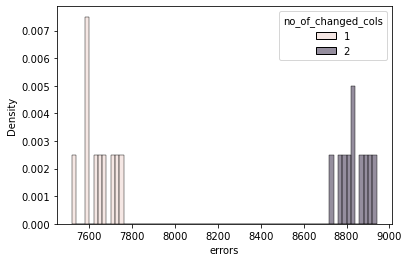

In [91]:
sns.histplot( data = error_df, x = "errors", hue = "no_of_changed_cols", stat="density", binwidth=20)
plt.plot()